### Problem 1. Extreme Temperatures (#Probability, #ModelSelection)

#### Part 1
We should first find the probability that a record high occurs in a specific year. Because the temperature for each year are sampled i.i.ds from a continuous distribution, there is equal probability of each year having the greatest temperature in all years up to and including n. This probability is independent of the distribution because it is universal for every continuous distribution.\
$I_{a_n}: record\ high\ in\ year\ n$\
$E(I_{a_n}) = P(a_n) = 1/n$

To compute the expected number of record highs, we can sum the probability of having a record high in each year over all 100 years.\
$H: number\ of\ record\ highs$\
$E(H) = \sum^n_{i=1} 1/n$

This sum is identical to the harmonic series, and thus we are able to easily evaluate it. Our solution is generalisable to record lows as well due to the universality of continuous distributions discussed above (it is equally likely for any of n years to have the lowest temperature).\
$E(H) = ln(n) + \lambda =  ln(100) + 0.577 = 5.182$\
$L: number\ of\ record\ lows$\
$E(L) = 5.182$

Because we want to find the number of years in which a record occurs (high or low), we can just sum the expected record lows and record highs. There will never be a year in which there is both a record high and a record low except 2001, which must have both. To account for this, we must subtract 1 from the sum of the expected highs and lows.\
$R: number\ of\ record\ years$\
$E(R) = E(L) + E(H) - 1 = 5.182 + 5.182 - 1 = 9.36$

#### Part 2
To get the probability that the first record high (bar 2001) comes after year n, we can find the probability that it does not come before or at year n. To do this, we can multiply the probabilities that it does not happen in year 2, does not happen in year 3, and so on until year n. We use multiplication here because we are considering the combination of events ('and'), and the highs of each year are independent.\
$P(a_n') = 1-P(a_n) = 1-1/n = (n-1)/n$\
$P(N>n) = P(a_2', a_3',...,a_n') = P(a_2')P(a_3')...P(a_n')$

The product of terms equates to (n-1) factorial from multiplication of integers up to (n-1) in the numerator, and n factorial from multiplication of integers up to n in the denominator. To find the PMF we take the probability of between n and n+1 as per the definition.\
$P(N>n) = \prod_{i=2}^n{(n-1)/n} = 1/2 * 2/3 *...*(n-1)/n = (n-1)!/n! = 1/n$\
$f(N) = P(n+1>N>n) = 1/n-1/(n+1) = 1/(n(n+1))$

#### Part 3

Experimental mean number of record highs/lows: 9.3626
Theoretical expected number of record highs/lows: 9.364770371976183


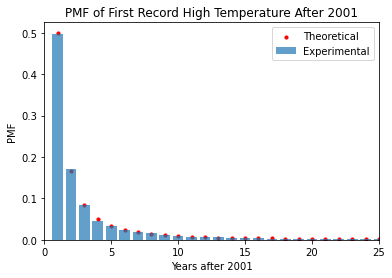

In [118]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

trials = 10000
n=100
list_mins = []
list_maxes = []
first_highs = []

for _ in range(trials):
    # arbitrary continuous distribution
    temps = sts.norm().rvs(n)
    max_temp = float('-inf')
    maxes = 0
    min_temp = float('inf')
    mins = 0
    high_recorded = False
    
    # iterate over temperatures, adding to max and min when record occur
    for t in range(len(temps)):
        if temps[t] < min_temp:
            mins += 1
            min_temp = temps[t]
            
        if temps[t] > max_temp:
            maxes += 1
            max_temp = temps[t]
            
            # record first highs for each trial
            if t != 0 and high_recorded == False:
                high_recorded = True
                first_highs.append(t)
            
    list_maxes.append(maxes)
    list_mins.append(mins)
    
print('Experimental mean number of record highs/lows:', np.mean(list_maxes)+np.mean(list_mins)-1)
print('Theoretical expected number of record highs/lows:', 2*(np.log(n) + 0.577215)-1)

x = np.arange(1, 100, 1)
plt.bar(x, [first_highs.count(i)/trials for i in x], alpha=0.7, label='Experimental')
plt.scatter(x, [1/(n*(n+1)) for n in x], label='Theoretical', c='red', s=10)
plt.legend()
plt.title('PMF of First Record High Temperature After 2001')
plt.xlabel('Years after 2001')
plt.ylabel('PMF')
plt.xlim([0,25])
plt.show()

#### Part 4
We could take several time frames (eg. 1800-1899, 1900-1999, etc.) and look at the distribution of the first record highs after each year in the time frames (eg. first high after 1800, first high after 1801...). These distributions could then be compared to determine whether or not they are significantly different from the above PMF distribution. If the mass is skewed further to the left, it is likely that global warming is occuring as the years before a record high are decreasing. We can also compare the distributions for earlier time frames to later ones. If global warming is occuring, we would also expect more mass to lie to the left of the distribution. We should be careful here about the cyclical nature of global warming, and ensure that our time frames account for this.

We could use Bayesian model selection, taking this model (which assumes no temperature change over time), and a second model (that assumes temperature increase to some extent). We could use data from the last century to compute a likelihood for both models. We would use a prior of 0.5 for both (as we have no reason to prefer either), and use this to calculate a posterior for both models. If the posterior was greater for the model that assumed temperature increase over time, we may conclude that global warming is occuring.

We could also measure the number of record highs over each time frame, and compare these values to 5.18, the expected number of highs in a 100 year period. If the number of highs for each decade is increasing, then we could predict global warming is happening.

### Problem 2. Starry Night (#ParameterEstimation)

We can use Bayesian parameter estimation to determine a 95% credible interval for the value for the length of the square s. Because we have no knowledge about the value of s to begin with, we can use a uniform prior. Assuming coordinates are in metres, we take a to be 0.1m as the smallest a window could likely be, and b to be 2m, the largest a window is likely to be. We do not incorporate our knowledge of the data as this is the prior.

The likelihood of a uniform distribution is given by $\prod_{i=1}^n {1/(b-a)}$. Because we are working in two dimensions (bivariate uniform), we change this likelihood to $\prod_{i=1}^n {1/A} $, where $A$ is the area of the region (in this case $s^2$). We can then to simplify the likelihood function to $1/s^{2n}$. This, however, is only valid in the case that the data points lie within the square. If $s$ is smaller than the greatest distance between two data points along the x or y axis, the likelihood function must be 0, as the probability of obtaining this data point given s is 0. This would lead to a posterior of 0 also for such values (as you can see from the graphs below).

We can use computational tools to compute the posterior distribution, taking the credible interval as the interval between which 95% of the distribution lies. From the below results, we see that the posterior probability that $s$ lies within the interval [0.776, 0.881] is 0.954.

The parameter s is in the interval [0.776, 0.881] with probability 0.954


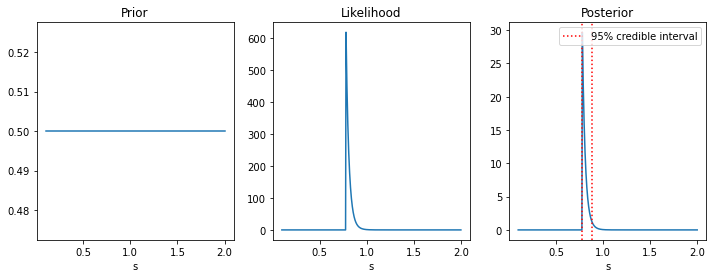

In [119]:
x = [5.079, 4.341, 4.777, 4.717, 4.484, 4.995, 4.924, 4.530, 4.774, 4.658, 4.302, 4.341, 4.348]
y = [1.493, 1.657, 1.811, 1.28, 1.936, 1.444, 1.922, 1.72, 1.525, 2.049, 1.439, 1.971, 1.919]
n = len(x)
points = 400

mins = 0.1 # min distance between points
maxs = 2 # qualitative estimate
s_values = np.linspace(mins, maxs, points)
prior = sts.uniform(mins, maxs).pdf(s_values) # P(s)

rangex = max(x)-min(x)
rangey = max(y)-min(y)
likelihood = []

for i in range(points):
    
    # pdf if square not large enough to fit values
    if s_values[i] < rangex or s_values[i] < rangey:
        likelihood.append(0)
        
    # pdf if square large enough to fit values
    else:
        likelihood.append((1/s_values[i])**(2*n))

# compute posterior using trapz integration
from scipy.integrate import trapz
product = prior * likelihood
marginal_likelihood = trapz(product, s_values)
posterior = product / marginal_likelihood


# prior plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Prior')
plt.xlabel('s')
plt.plot(s_values, prior)

# likelihood plot
plt.subplot(1, 3, 2)
plt.title('Likelihood')
plt.xlabel('s')
plt.plot(s_values, likelihood)

# posterior plot
plt.subplot(1, 3, 3)
plt.title('Posterior')
plt.xlabel('s')
plt.plot(s_values, posterior)

# change indexes to give 95% credible interval
index = [142, 164]
interval = [s_values[index[0]], s_values[index[1]]]
interval_probability = trapz(posterior[index[0]:index[1]+1], s_values[index[0]:index[1]+1])
print(f'The parameter s is in the interval [{interval[0]:.3f}, {interval[1]:.3f}] 'f'with probability {interval_probability:.3f}')
plt.axvline(interval[0], color='red', linestyle=':', label='95% credible interval')
plt.axvline(interval[1], color='red', linestyle=':')
plt.legend()
plt.show()

The above conclusions are based solely on the side of the square, $s$. However, we should also incorporate consider the centre of the square given by the coordinates $(x,y)$. To find the posterior over $s$ ($P(s|data)$), we should:

1. Find the prior distribution: $P(s, x, y)$. This should be the product of three uniform distributions due to the (assumed) independence of $x$, $y$, and $s$: $P(x)P(y)P(s)$. We can assume large values for the upper bound of the height and width of the walls in our house (150m).\
$S \sim Uniform(0.1, 2)$\
$X \sim Uniform(0, 150)$\
$Y \sim Uniform(0, 150)$\
$P(x)P(y)P(s) = 1/(2-0.1) * 1/(150-0) * 1/(150-0) = 1/42750$


2. Find likelihood distribution: $P(data|s, x, y)$. This is given by the formula used above: $1/s^{2n}$. However, we must account for the conditions on which this would be valid: $x-s/2 \le data_x \le x+s/2$ and $y-s/2 \le data_y \le y+s/2$ (must hold for all $x$ and $y$ coordinates for the likelihood to have a non-zero value). 


3. Find marginal probability: $P(data)$. We can do this by integrating (likelihood * prior) over $x$, $y$, and $s$ over the bounds on which they are valid: $\int_0^{150} \int_0^{150} \int_{0.1}^2 1/s^{2n} * 1/42750\ ds\ dx\ dy$, taking into consideration that the likelihood is 0 for certain values.


4. Find the posterior over $x$, $y$, and $s$: $P(s, x, y|data)$. We do this by computing: (likelihood * prior / marginal).


5. Find the posterior over $s$ only: $P(s|data)$. We can integrate out $x$ and $y$ from the posterior PDF $f(s, x, y|data)$: $\int_0^{150} \int_0^{150} f(s, x, y|data)\ dx\ dy$.

### References
Cambridge University. (n.d.). 10 -BIVARIATE DISTRIBUTIONS.
https://www.cl.cam.ac.uk/teaching/0708/Probabilty/prob10.pdf

Scheffler, K. (2022). CS114 Session 14 - [8.1] Synthesis: Parameter estimation. Forum. https://forum.minerva.edu/app/courses/2109/sections/8431/classes/63120 

Wikimedia Foundation. (2022, March 15). Harmonic series (mathematics). Wikipedia. https://en.wikipedia.org/wiki/Harmonic_series_(mathematics) 

Zach. (2021, March 2). Maximum likelihood estimation (MLE) for a uniform distribution. Statology.
https://www.statology.org/mle-uniform-distribution/ 